('kd', 0.3141592653589793, 'ka', 0.02, 'k2', 0.1, 'kon', 0.018802966006133962)
L 1.0
Ls 1.33634807721
rv 0.125
K 4.0
V1 1.0 V2 2.3864853865 Nv 216
tau 0.625
no of b 1
vol fract % 34.2815041525
('kd', 0.12566370614359174, 'ka', 0.02, 'k2', 0.1, 'kon', 0.017253948766031743)
L 1.0
Ls 1.18478834472
rv 0.05
K 10.0
V1 1.0 V2 1.66311514935 Nv 2352
tau 0.1
no of b 1
vol fract % 3.14830140176
('kd', 0.025132741228718346, 'ka', 0.02, 'k2', 0.1, 'kon', 0.011137254482883557)
L 1.0
Ls 1.03048203347
rv 0.01
K 50.0
V1 1.0 V2 1.09426188602 Nv 193440
tau 0.004
no of b 1
vol fract % 0.0382795952075


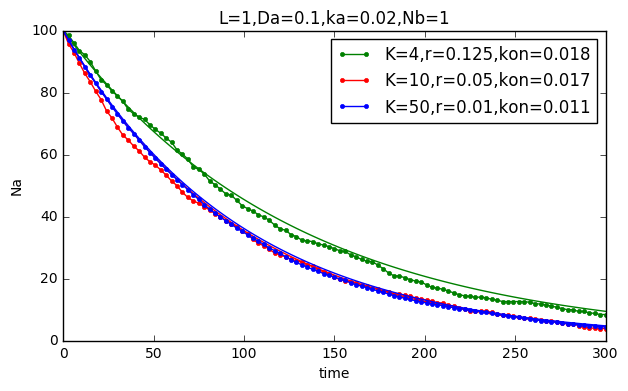

In [1]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt

Ks = [4,10,50]
clrs = ['g','r','b']
for K,clr in zip(Ks,clrs):
    run = 100
    T = 300

    L=1.
    voxelr=L/(2*K)
    Da = 0.1
    Db = 0.
    D=Da+Db
    kd= 4.0*math.pi*D*2*voxelr
    ka = 0.02
    kon = (ka*kd)/(ka+kd)
    k2 = 0.1
    print('kd',kd,'ka', ka,'k2',k2,'kon',kon)
    V1 = L**3
    ws = spatiocyte.SpatiocyteWorld(ones()*L,voxelr)
    V2 =  ws.get_volume()
    Nv = ws.size()

    Ls = (V2)**(1./3)
    print 'L',L
    print 'Ls',Ls
    print 'rv',voxelr
    print 'K',L/(2*voxelr)
    print 'V1',V1,'V2',V2,'Nv',Nv
    print 'tau',(2*voxelr)**2/Da
    Nb = 1
    Na=100

    phi = (100*Na*4.*math.pi*(voxelr**3)/(3*V2)) 
    print 'no of b',Nb
    print 'vol fract %',phi

    with species_attributes():
        A | {'D': str(Da), 'radius':str(voxelr)}
        B | {'D': str(Db), 'radius':str(voxelr)}

    with reaction_rules():#for egfrd 
        A + B > B | ka
        #~A > A | k2/V2

    m1 = get_model()

    with species_attributes():
        A | {'D': str(Da), 'radius':str(voxelr)}
        B | {'D': str(Db), 'radius':str(voxelr)}

    with reaction_rules():#for spa 
        A + B > B | ka
        #~A > A | k2

    m2 = get_model()

    with reaction_rules():#for spa 
        A + B > B | kon
        #~A > A | k2

    m3 = get_model()   
    
    ode = np.array(ensemble_simulations(1, T, y0={'A':Na,'B': Nb}, model=m3, solver="ode", volume=V2,return_type='array'))
    to = ode[0][0][:,0]
    nao = np.mean(ode[0][:,:,1],axis=0)
    
    spa = np.array(ensemble_simulations(run, T, y0={'A':Na,'B': Nb}, model=m2, solver=("spatiocyte", voxelr), volume=V1,return_type='array'))
    ts = spa[0][0][:,0]
    nas = np.mean(spa[0][:,:,1],axis=0)
    plt.plot(to,nao,c=clr,linestyle='-')
    plt.plot(ts,nas,c=clr,marker='.',label='K='+str(K)+',r='+str(voxelr)+',kon='+str(int(kon*1000)/1000.)  )
    plt.ylabel('Na')
    plt.xlabel('time')
plt.title("L={4:1.0f},Da={0:0.1f},ka={1:0.2f},Nb={5:1.0f}".format(Da,ka,kd,k2,L,Nb))
fig = plt.gcf()
fig.set_size_inches(7,4)
plt.legend(loc='best')
plt.savefig("figure/Sturrock_reaction_2ndorderonly.png",format='png',dpi=100)

In [2]:
plt.savefig("figure/Sturrock_reaction.png",format='png',dpi=100)

In [ ]:
eg = np.array(ensemble_simulations(1, T, y0={"A": Na,'B': Na}, model=m1, solver=("egfrd",voxelr), volume=V2,return_type='array'))
te = eg[0][0][:,0]
nae = np.mean(eg[0][:,:,1],axis=0)

plt.plot(ts,nas,'r--')
plt.plot(te,nae,'b--')

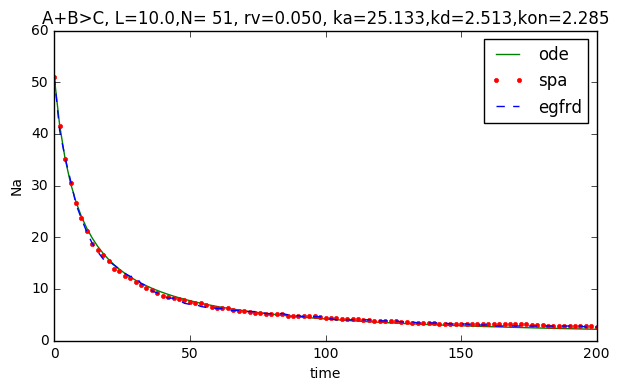

In [4]:
plt.plot(ts,nas,'r.',label='spa')
plt.plot(te,nae,'b--',label='egfrd')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('Na')
fig = plt.gcf()
fig.set_size_inches(7,4)
plt.title('A+B>C, L={0:0.1f},N={1:3.0f}, rv={2:0.3f}, ka={3:0.3f},kd={4:0.3f},kon={5:0.3f}'.format(L,N,voxelr,ka,kd,kon))
#plt.savefig("figure/2ndodr_irr_Difflim_L{0:0.1f}_rv{1:0.2f}.png".format(L,voxelr),format='png',dpi=100)

In [5]:
#stack = np.column_stack((timespa,Nam))
#filename = open('output/Dlim_spa_2ndorder_irr_L1_kakd5.csv','w')
#np.savetxt(filename,stack,fmt='%s')
#filename.close()

In [2]:
0.02/(0.8*3.14)

0.007961783439490444